# Alberi decisionali

Per prima cosa, importiamo le librerie necessarie

In [91]:
import pandas as pd
import matplotlib.pyplot as plt

## Importiamo il dataset

In [6]:
import pandas as pd
# Load data

df = pd.read_csv('credit.csv')

# number of rows and columns
print(df.shape)

male_counts = df['male'].value_counts()

print(male_counts)

# describe columns type
print(df.dtypes)

df = df.dropna()
print(df.shape)

(690, 16)
b    468
a    210
Name: male, dtype: int64
X                  int64
male              object
age              float64
debt             float64
married           object
backCustomer      object
etnicity          object
yearemployed     float64
priordefault      object
employed          object
creditScore        int64
driverlicence     object
citizen           object
zipcode          float64
income             int64
approved          object
dtype: object
(665, 16)


In [7]:
# Change column X to ID
df = df.rename(columns={'X': 'ID'})

# Change column name male to Gender
df = df.rename(columns={'male': 'Gender'})

# Change gender to 0 and 1
df['Gender'] = df['Gender'].map({'a': 0, 'b': 1})
df['Gender'] = df['Gender'].astype('object')

# Change married to 0 and 1
df['married'] = df['married'].map({'u': 1, 'y': 0, 'l': 0})

# Change backCustomer to BankCustomer and change to 0 and 1
df = df.rename(columns={'backCustomer': 'BankCustomer'})
df['BankCustomer'] = df['BankCustomer'].map({'g': 1, 'gg': 0, 'p': 0})

# change etnicity to White, Black, Latin, Other
df = df.rename(columns={'etnicity': 'Ethnicity'})
df['Ethnicity'] = df['Ethnicity'].map({'v': "White", 'h': "Black", 'z': "Other", 'o': "Other", 'n': "Other", 'ff': "Latin", 'j': "Other", 'dd': "Other", 'bb': "Other"})

# change PriorDefault to 0 and 1
df = df.rename(columns={'priordefault': 'PriorDefault'})
df['PriorDefault'] = df['PriorDefault'].map({'t': 1, 'f': 0})

# change Employed to 0 and 1
df = df.rename(columns={'employed': 'Employed'})
df['Employed'] = df['Employed'].map({'t': 1, 'f': 0})

# change DriversLicense to 0 and 1
df = df.rename(columns={'driverlicence': 'DriversLicense'})
df['DriversLicense'] = df['DriversLicense'].map({'t': 1, 'f': 0})

# change Citizen to byBirth, byOtherMeans, Temporary
df = df.rename(columns={'citizen': 'Citizen'})
df['Citizen'] = df['Citizen'].map({'g': "byBirth", 's': "byOtherMeans", 'p': "Temporary"})

# change approved to 0 and 1
df = df.rename(columns={'approved': 'Approved'})
df['Approved'] = df['Approved'].map({'-': 0, '+': 1})

# saving numerical attributes in a list:
numerical_columns = ['age', 'debt', 'yearemployed', 'income', 'creditScore']

# saving non-numerical attrbutes in a list:
nonnumericals = ['Gender', 'married', 'BankCustomer', 'Ethnicity', 'PriorDefault', 'Employed', 'DriversLicense', 'Citizen']

df.dtypes

ID                  int64
Gender             object
age               float64
debt              float64
married             int64
BankCustomer        int64
Ethnicity          object
yearemployed      float64
PriorDefault        int64
Employed            int64
creditScore         int64
DriversLicense      int64
Citizen            object
zipcode           float64
income              int64
Approved            int64
dtype: object

In [9]:
print(f"Records: {df.shape[0]}")
print(f"Columns: {df.shape[1]}")

Records: 665
Columns: 16


Analizziamo i tipi delle colonne e aggiustiamoli di conseguenza

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

# Encoding:
label_encoder = LabelEncoder()
df['Ethnicity'] = label_encoder.fit_transform(df['Ethnicity'])
df['Citizen'] = label_encoder.fit_transform(df['Citizen'])
df['Gender'] = label_encoder.fit_transform(df['Gender'])
# df = df.drop(["ID", "zipcode", "BankCustomer", "income", "yearemployed"], axis=1)
feature_names = set(df.columns) - set(["Approved"])
target_name = "Approved"

X_train, X_test, y_train, y_test = train_test_split(df[feature_names], df[target_name], test_size=0.3, random_state=42)

C:\Users\edo01\AppData\Local\Temp\ipykernel_1008\63127621.py:15: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  X_train, X_test, y_train, y_test = train_test_split(df[feature_names], df[target_name], test_size=0.3, random_state=42)


In [24]:
print(f"Numero di record nel training set: {X_train.shape[0]}")
print(f"Numero di record nel test set: {X_test.shape[0]}")

Numero di record nel training set: 465
Numero di record nel test set: 200


Vediamo nel training set, e nel test set, quante persone sono sopravvissute

In [25]:
y_train.value_counts() / y_train.count()

0    0.539785
1    0.460215
Name: Approved, dtype: float64

In [26]:
y_test.value_counts() / y_test.count()

0    0.58
1    0.42
Name: Approved, dtype: float64

## Costruiamo un albero decisionale

Iniziamo a togliere le features che sicuramente non saranno utili in fase di training.

In [27]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix

model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Visualizza l'albero decisionale
fig, ax = plt.subplots(figsize=(150, 100))
plot_tree(model, filled=True, ax=ax)
plt.plot()

[]

## Inferenza

In [28]:
# predizione del nuovo modello
y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

print("Confusion matrix:\n", cm)
print("\nAccuracy:", cm.diagonal().sum() / cm.sum())

Confusion matrix:
 [[99 17]
 [12 72]]

Accuracy: 0.855


## Parametro di complessità

Vediamo come varia l'accuratezza dell'albero decizionale in funzione della complessità dell'albero

In [29]:
path = model.cost_complexity_pruning_path(X_train, y_train)

ccp_alphas = path.ccp_alphas

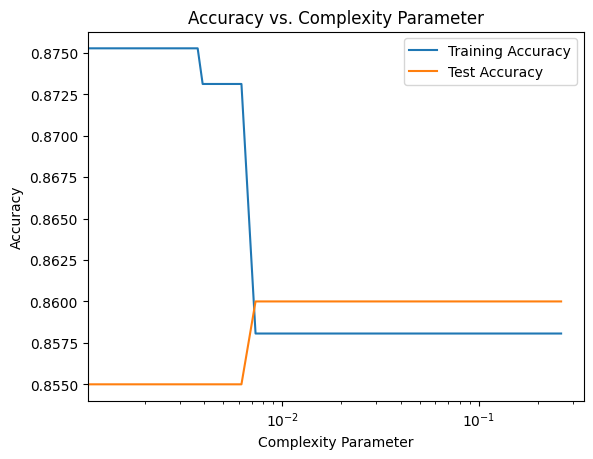

In [30]:
#complexity_values = [0.001, 0.01, 0.1, 1, 10, 100]
ccp_alphas = path.ccp_alphas

# Addestra l'albero decisionale con diversi valori di complessità
train_accuracy = []
test_accuracy = []
for complexity in ccp_alphas:
    clf = DecisionTreeClassifier(max_depth=3, ccp_alpha=complexity)
    clf.fit(X_train, y_train)
    train_accuracy.append(clf.score(X_train, y_train))
    test_accuracy.append(clf.score(X_test, y_test))

# Plotta l'accuratezza del modello in funzione del parametro di complessità
plt.plot(ccp_alphas, train_accuracy, label='Training Accuracy')
plt.plot(ccp_alphas, test_accuracy, label='Test Accuracy')
plt.xlabel('Complexity Parameter')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Complexity Parameter')
plt.xscale('log')
plt.legend()
plt.show()

In [107]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.2633391736044478


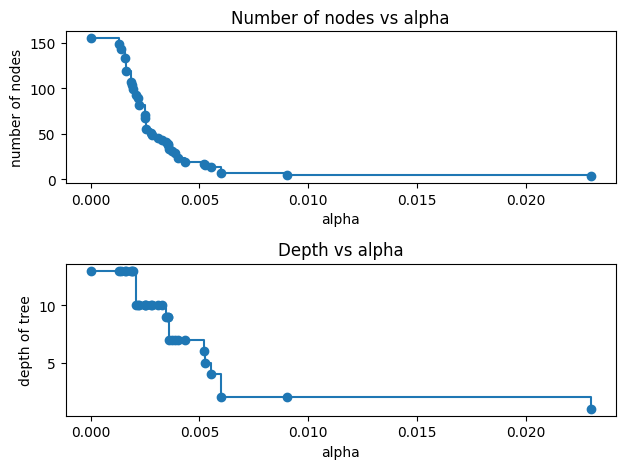

In [108]:
clfs = clfs[:-1]
complexity_values = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1)
ax[0].plot(complexity_values, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(complexity_values, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

## Assignment

1. Disegnare gli alberi tagliati in accordo al parametro di complessità
2. Provate a creare  altri alberi modificando i parametri nel costruttore DecisionTreeClassifier(). Ad esempio, cosa succede se si cambiano i criteri di splitting? Come varia l'accuratezza? Cosa succede all'aumentare della max_depth?